In [4]:
# Simulation rounds to verify bias, variance, and test MSE relationship
n <- 50
n_sim <- 3000

x0 <- 0.8
df.test <- data.frame(x = x0)
pred <- matrix(NA, nrow = n_sim, ncol = 5)

set.seed(99)
for (k in 1:n_sim) {
    x <- runif(n) # nolint: indentation_linter.
    e <- rnorm(n, sd = 0.5)
    y <- x^2 + e
    df.train <- data.frame(x, y)

    # fit five linear models
    model.0 <- lm(y ~ 1, data = df.train)
    model.1 <- lm(y ~ x, data = df.train)
    model.2 <- lm(y ~ poly(x, 2), data = df.train)
    model.4 <- lm(y ~ poly(x, 4), data = df.train)
    model.8 <- lm(y ~ poly(x, 8), data = df.train)

    pred[k, 1] <- predict(model.0, newdata = df.test)
    pred[k, 2] <- predict(model.1, newdata = df.test)
    pred[k, 3] <- predict(model.2, newdata = df.test)
    pred[k, 4] <- predict(model.4, newdata = df.test)
    pred[k, 5] <- predict(model.8, newdata = df.test)
}

y0 <- x0^2 + rnorm(n_sim, sd = 0.5)

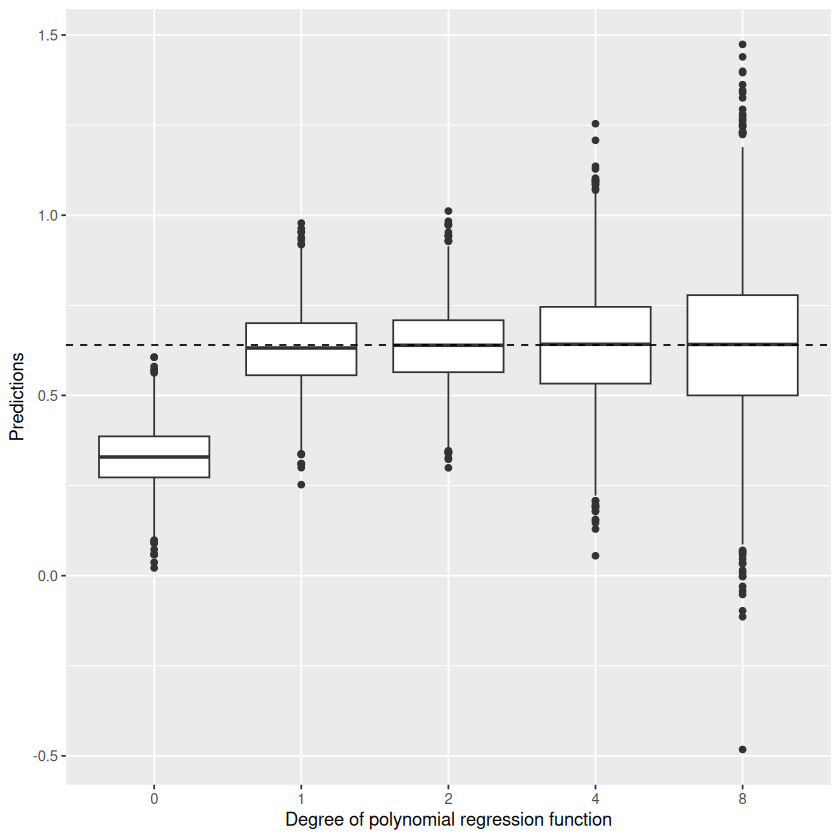

In [5]:
# demonstrates bias/variance trade-off
pred.all <- c(pred[, 1], pred[, 2], pred[, 3], pred[, 4], pred[, 5])
degree <- as.factor(rep(c(0, 1, 2, 4, 8), each = n_sim))
dat <- data.frame(degree, pred.all)

library(ggplot2)
ggplot(dat, aes(x = degree, y = pred.all)) + 
    geom_boxplot() +
    geom_hline(yintercept = x0^2, linetype = "dashed") +
    labs(x = "Degree of polynomial regression function", y = "Predictions")

In [9]:
# set the arrays
bias <- Var <- test.error <- rep(NA, 5)

# note: review the formulas so this makes sense
print("Squared Bias")
for (j in 1:5) {
    bias[j] <- (mean(pred[, j]) - x0^2)^2
    print(bias[j])
}

print("Variance")
for (j in 1:5) {
    Var[j] <- mean((pred[, j] - mean(pred[, j]))^2)
    print(Var[j])
}

print("Test MSE")
for (j in 1:5) {
    test.error[j] <- mean((y0 - pred[, j])^2)
    print(test.error[j])
}

modelnum <- c(0, 1, 2, 4, 8)
stat <- data.frame(modelnum, bias, Var, test.error)
stat

[1] "Squared Bias"
[1] 0.09643061
[1] 0.0001210225
[1] 9.635837e-06
[1] 1.609129e-06
[1] 1.572503e-06
[1] "Variance"
[1] 0.006804264
[1] 0.01134353
[1] 0.01136263
[1] 0.02511954
[1] 0.04702081
[1] "Test MSE"
[1] 0.3592671
[1] 0.2653417
[1] 0.2650296
[1] 0.2800303
[1] 0.2998045


modelnum,bias,Var,test.error
<dbl>,<dbl>,<dbl>,<dbl>
0,9.643061e-02,0.006804264,0.3592671
1,1.210225e-04,0.011343526,0.2653417
2,9.635837e-06,0.011362628,0.2650296
4,1.609129e-06,0.025119540,0.2800303
8,1.572503e-06,0.047020806,0.2998045


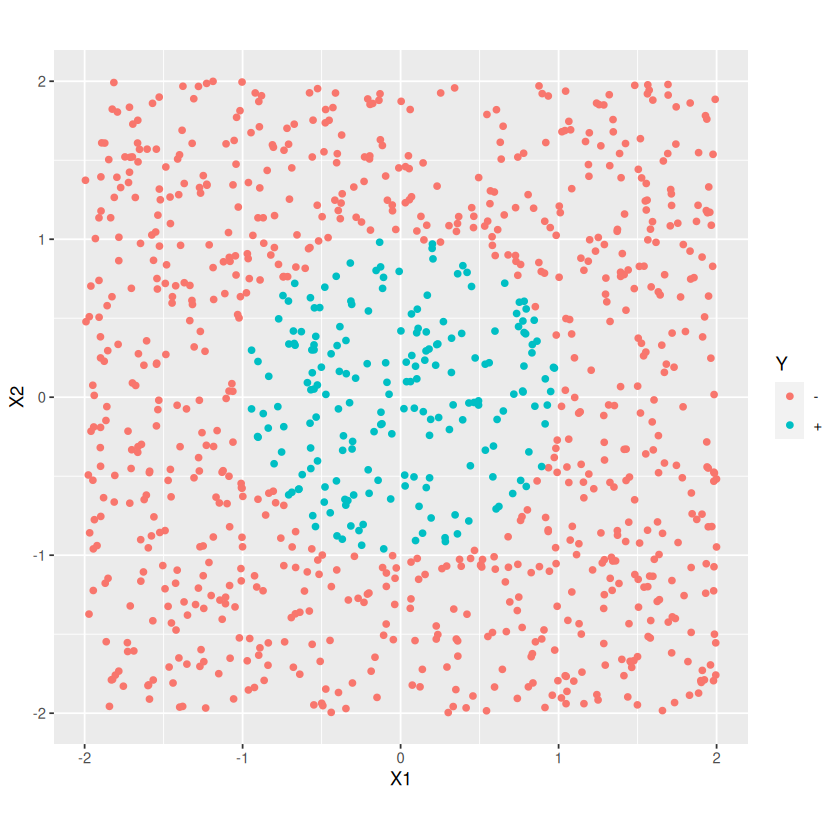

In [23]:
# Feature generation

# first generate points by whether or not they are in the unit circle
set.seed(10)
X1 <- runif(1000, -2, 2)
X2 <- runif(1000, -2, 2)
Y = ifelse(sqrt(X1^2 + X2^2) < 1, "+", "-") # target variable
df <- data.frame(X1, X2, Y)

ggplot(data = df, aes(x = X1, y = X2, color = Y)) +
    geom_point() +
    coord_fixed()

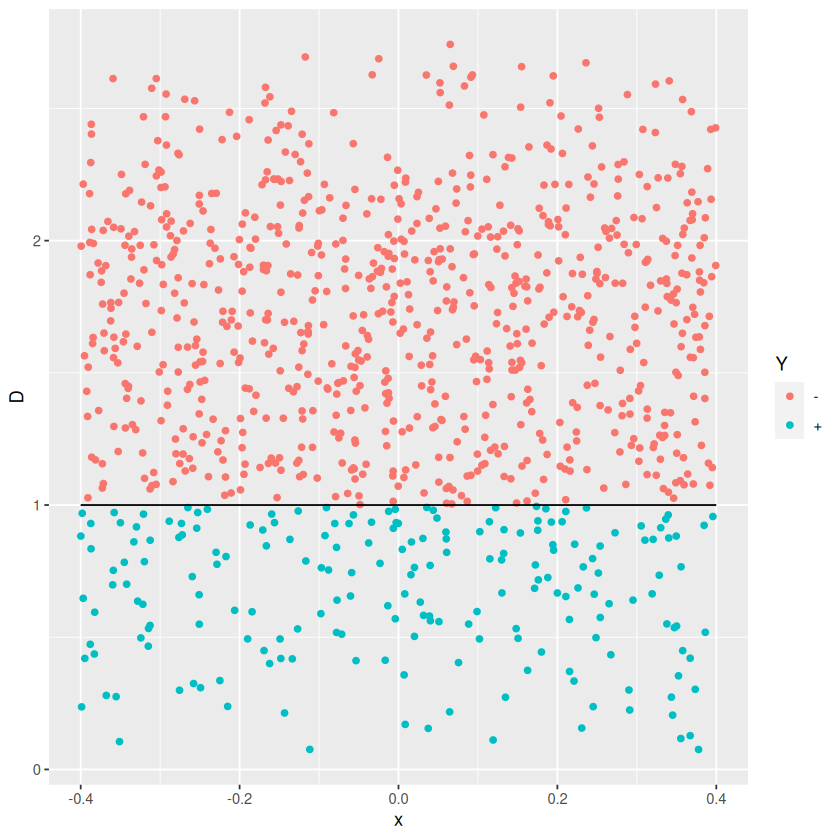

In [24]:
# In this case let's generate a feature by getting the distance of the values
df$D <- sqrt(df$X1^2 + df$X2^2)

ggplot(data = df, aes(x = 0, y = D, color = Y)) +
    geom_point(position = "jitter") +
    annotate("segment", x = -0.4, xend = 0.4, y = 1, yend = 1)